# Development Notebook for the JSON parser

In [1]:
# !pip uninstall -y afc
# !pip install ..

### externalConfig.py

### Test it

In [2]:
from afc.externalConfig import read_json_config, DEFAULT_JSON_PATH

In [3]:
import os
import io
import pandas as pd
import datetime as dtm
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

try:
    root = os.path.dirname(os.path.abspath(__file__))
except:
    root = os.getcwd()

from afc.ctrlWrapper import Controller, make_inputs
from afc.utility.plotting import plot_standard1

rcontrib: warning - no light sources found
rcontrib: warning - no light sources found
rcontrib: warning - no light sources found


Log-message:
 Duration [s]		0.36
Objective [$]		18.48			6.58 (Total Cost)
Cost [$]		12.47 (Energy)	6.02 (Demand)
CO2 Emissions [kg]		0.0

Duration:
 {'duration': {'radiance': 13.468115091323853, 'glare': 2.903610944747925, 'varts': 0.149885892868042, 'optall': 0.5189292430877686, 'outputs': 0.0025682449340820312, 'all': 17.060654163360596}}
Optimization:
 {'opt-stats': {'duration': 0.36226654052734375, 'termination': 'optimal', 'objective': 18.483656779999997}}


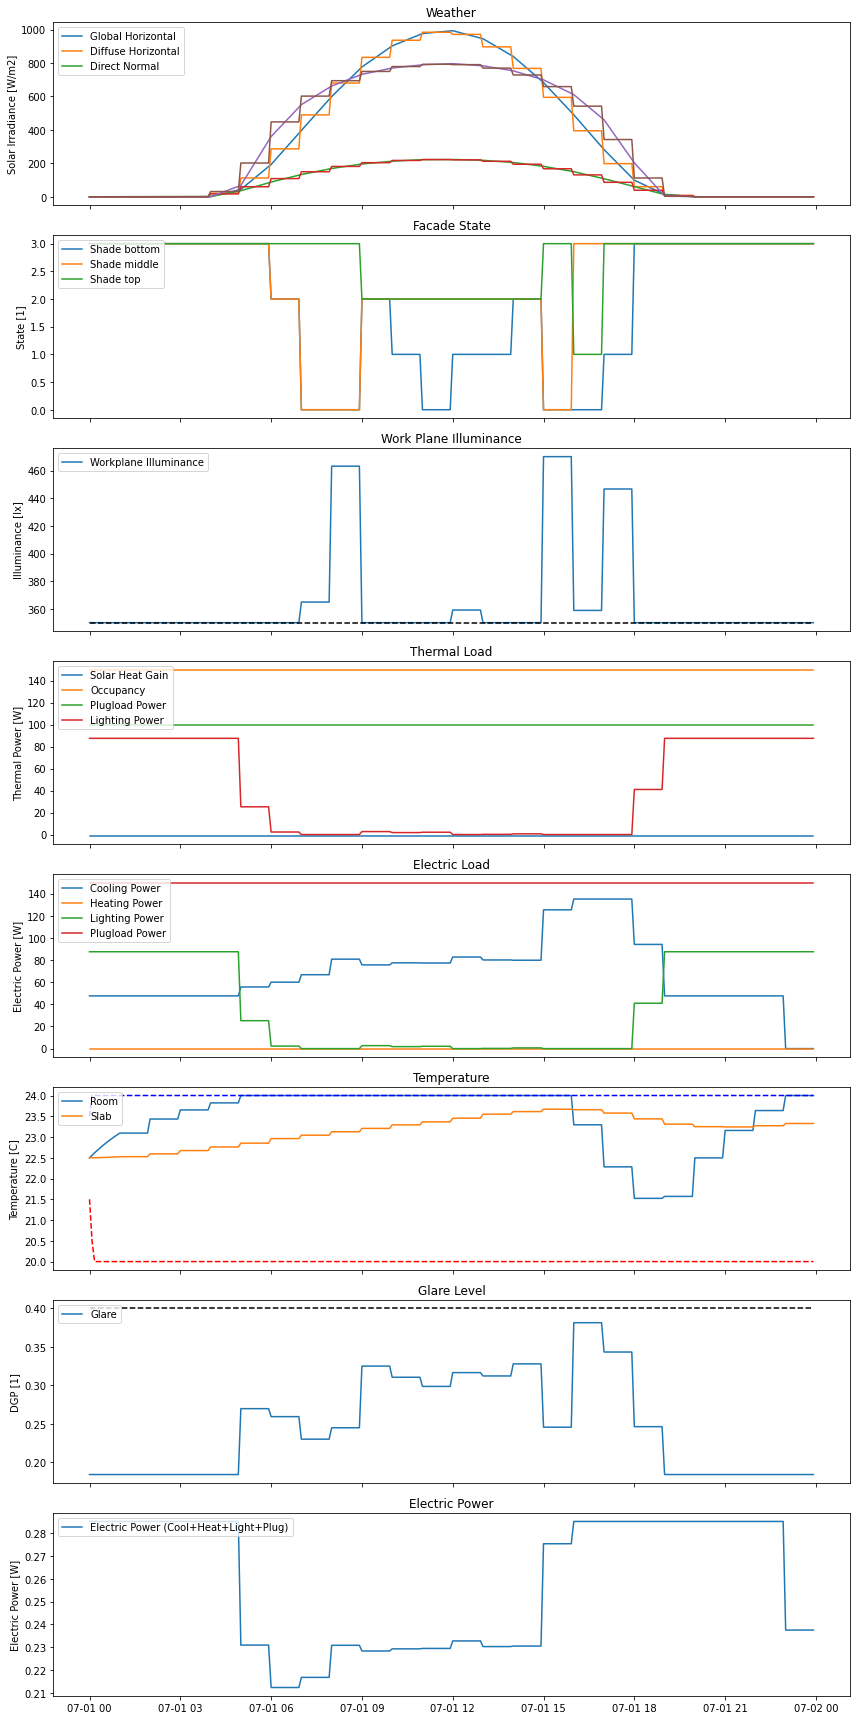

In [4]:
from afc.utility.weather import example_weather_forecast
from afc.defaultConfig import default_parameter

# Import and read weather (forecast) data
wf = example_weather_forecast(date='2023-07-01')
df = wf[wf.index.date == wf.index[0].date()]

# Initialize controller
ctrl = Controller()

# Path to json configuration
json_config_path = DEFAULT_JSON_PATH

# Create the inputs vector
parameter = read_json_config(json_config_path)
inputs = make_inputs(parameter, wf)

# Query controller
ctrl.do_step(inputs=inputs) # Initialize
print('Log-message:\n', ctrl.do_step(inputs=inputs))
print('Duration:\n', ctrl.get_output(keys=['duration']))
print('Optimization:\n', ctrl.get_output(keys=['opt-stats']))
df = pd.read_json(io.StringIO(ctrl.get_output(keys=['output-data'])['output-data']))
plot_standard1(pd.concat([wf, df], axis=1).ffill().iloc[:-1])